# GeoPandas: paquete para agregar capacidades geoespaciales a pandas

[GeoPandas](http://geopandas.org/) es un proyecto de software libre que extiende los tipos de datos de [pandas](http://pandas.pydata.org/) para incorporar objetos geométricos (puntos, líneas, polígonos, etc). GeoPandas se apoya en las bibliotecas [Shapely](https://github.com/Toblerity/Shapely/) para realizar las operaciones geométricas, [Fiona](https://github.com/Toblerity/Fiona/) para acceder a los datos (ej. en archivos) y [Matplotlib](https://matplotlib.org/) para graficación.

El objetivo de GeoPandas es facilitar el trabajo con datos geoespaciales en el lenguaje Python, lo que se logra a través de la implementación de nuevas estructuras. Las dos estructuras principales de GeoPandas son:

- [GeoSeries](http://geopandas.org/data_structures.html#geoseries): es un vector en el que cada elemento es un conjunto de una o varias geometrías correspondientes a una observación. Por ejemplo, el polígono (o multipolígono) que representa una provincia.
- [GeoDataFrame](http://geopandas.org/data_structures.html#geodataframe): es una estructura tabular (i.e. con filas y columnas) de datos geométricos y no geométricos (ej. textos, números). El conjunto de geometrías se implementa a través de GeoSeries.

## Instalación

### En una estación de trabajo

geopandas puede instalarse tanto mediante [Conda](https://conda.io/) como mediante [pip](https://pypi.org/project/pip/).

```shell
# Instalación mediante Conda
conda install geopandas

# Instalación mediante pip
pip install geopandas
```

### En Google Colab

```shell
# Instalación de bibliotecas de GDAL para Python
!apt install gdal-bin python-gdal python3-gdal

# Instalación de r-tree
!apt install python3-rtree

# Instalación de GeoPandas
!pip install git+git://github.com/geopandas/geopandas.git

# Instalación de Descartes
!pip install descartes
```

## Carga

Para instalar [contextily](https://contextily.readthedocs.io/en/latest/):

```shell
!conda install -c conda-forge contextily -y
```

In [1]:
import os
import requests
import zipfile

import pandas as pd

import geopandas as gpd
import contextily as cx
from geojson import dump
from owslib.wfs import WebFeatureService

import matplotlib
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'contextily'

In [2]:
# Versión de geopandas
gpd.__version__

'0.10.2'

## Operaciones básicas

### read_file() - carga de datos

In [3]:
# Lectura de datos de países de Natural Earth

paises = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

paises

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


### info() - información general sobre un conjunto de datos

In [4]:
paises.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


### head(), tail(), sample() - despliegue de filas de un conjunto de datos

In [5]:
# Muestra de 10 filas
paises.head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


### Selección de columnas

In [6]:
paises[["name", "pop_est"]]

,name,pop_est
0,Fiji,920938
1,Tanzania,53950935
2,W. Sahara,603253
3,Canada,35623680
4,United States of America,326625791
...,...,...
172,Serbia,7111024
173,Montenegro,642550
174,Kosovo,1895250
175,Trinidad and Tobago,1218208


### Selección de filas

In [7]:
# Países con población estimada mayor o igual a mil millones
paises[paises["pop_est"] >= 1000000000]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
98,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."


### Selección de filas y columnas en la misma expresión

In [8]:
paises.loc[paises["pop_est"] >= 1000000000, ["name", "pop_est"]]

,name,pop_est
98,India,1281935911
139,China,1379302771


### plot() - mapeo

<AxesSubplot:>

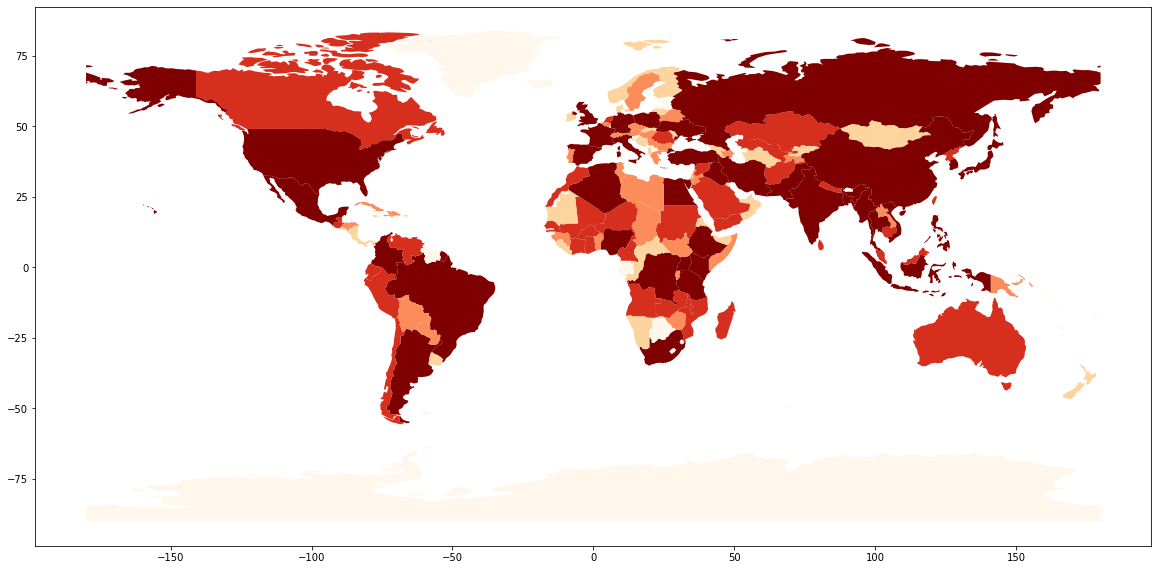

In [9]:
# Mapa de coropletas

paises.plot(column = "pop_est", 
            cmap='OrRd', 
            scheme='quantiles',
            figsize=(20, 20)
            )

<AxesSubplot:>

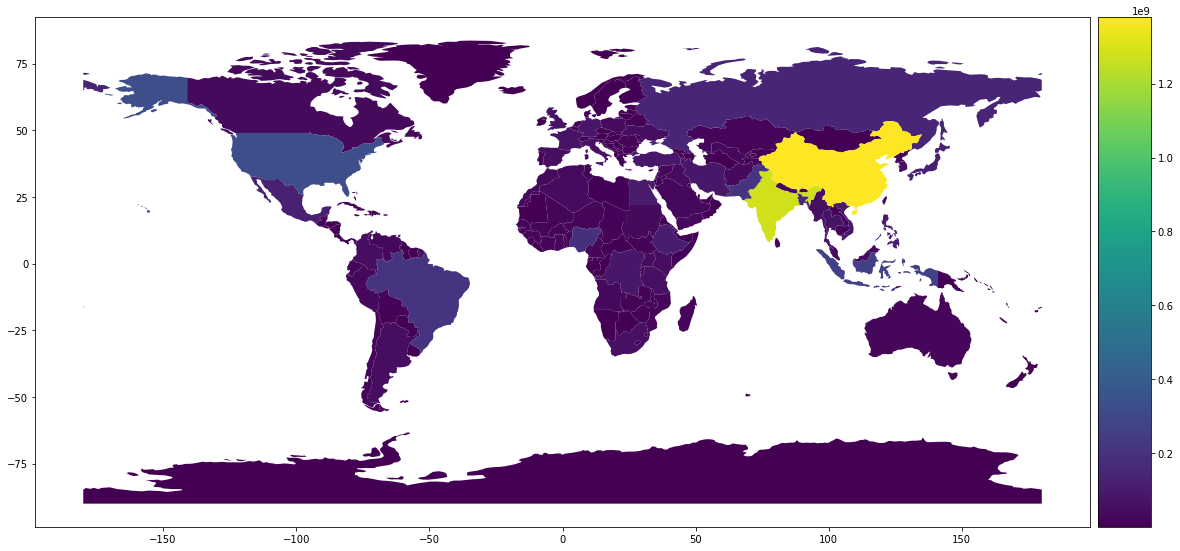

In [10]:
# Mapa de coropletas con leyenda

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

paises.plot(column='pop_est', ax=ax, legend=True, cax=cax)

<AxesSubplot:>

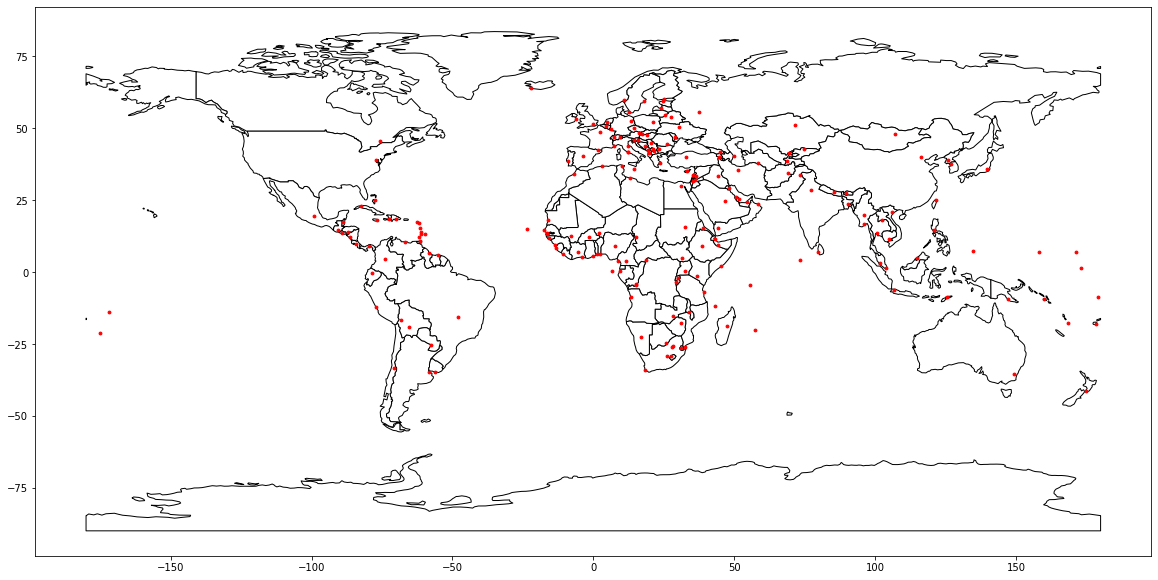

In [11]:
# Mapa con múltiples capas

ciudades = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

base = paises.plot(color='white', edgecolor='black', figsize=(20, 20))
ciudades.plot(ax=base, marker='o', color='red', markersize=8)

## Ejemplos de uso

### Análisis de distribución de especies de murciélagos en Costa Rica

#### 1. Obtención de datos

##### Registros de presencia de murciélagos

In [12]:
# Descarga de archivo CSV comprimido en ZIP mediante solicitud tipo GET
response = requests.get('https://api.gbif.org/v1/occurrence/download/request/0105729-210914110416597.zip', 
                        allow_redirects=True)
open('datos/murcielagos.zip', 'wb').write(response.content)

# Descompresión
with zipfile.ZipFile("datos/murcielagos.zip") as zipfile:
    zipfile.extractall("datos/")
    
# Cambio de nombre del archivo CSV
os.rename("datos/0105729-210914110416597.csv", "datos/murcielagos.csv")

In [13]:
# Carga de registros de presencia de murciélagos en un dataframe

murcielagos = pd.read_csv("datos/murcielagos.csv", sep="\t")
murcielagos

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,3416142999,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/10118...,Animalia,Chordata,Mammalia,Chiroptera,Vespertilionidae,Rhogeessa,Rhogeessa io,...,Yuzefovich Alexander,2021-11-15T14:33:49,CC_BY_NC_4_0,jo22nfrog,jo22nfrog,NaN,NaN,2021-12-08T05:34:32.772Z,StillImage,COORDINATE_ROUNDED
1,3416092578,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/10131...,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Uroderma,Uroderma bilobatum,...,Merav Vonshak,2021-11-17T06:37:32,CC_BY_NC_4_0,Merav Vonshak,Merav Vonshak,NaN,NaN,2021-12-08T06:09:54.326Z,StillImage,COORDINATE_ROUNDED
2,3415771696,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/88766024,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Artibeus,Artibeus jamaicensis,...,Yuzefovich Alexander,2021-07-27T06:38:03,CC_BY_NC_4_0,Alex Castelein,Alex Castelein,NaN,NaN,2021-12-08T05:05:13.398Z,StillImage,COORDINATE_ROUNDED
3,3415765386,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/36722404,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Uroderma,Uroderma bilobatum,...,Jay,2019-12-17T22:12:20,CC_BY_NC_4_0,Jay,Jay,NaN,NaN,2021-12-08T04:59:02.428Z,StillImage,COORDINATE_ROUNDED
4,3415753400,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/39440952,Animalia,Chordata,Mammalia,Chiroptera,Emballonuridae,Rhynchonycteris,Rhynchonycteris naso,...,Jakob Fahr,2020-03-02T08:06:42,CC_BY_NC_4_0,Ben Zerante,Ben Zerante,NaN,NaN,2021-12-08T05:48:47.800Z,StillImage,COORDINATE_ROUNDED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13184,45849434,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:12726,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Anoura,Anoura geoffroyi,...,NaN,NaN,CC0_1_0,NaN,"Gardner, Alfred L.",NaN,NATIVE,2021-12-02T03:54:15.435Z,NaN,INSTITUTION_COLLECTION_MISMATCH
13185,45849433,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:12725,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Anoura,Anoura geoffroyi,...,NaN,NaN,CC0_1_0,NaN,"Gardner, Alfred L.",NaN,NATIVE,2021-12-02T03:54:15.435Z,NaN,INSTITUTION_COLLECTION_MISMATCH
13186,45849432,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:12724,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Anoura,Anoura geoffroyi,...,NaN,NaN,CC0_1_0,NaN,"Gardner, Alfred L.",NaN,NATIVE,2021-12-02T03:54:15.437Z,NaN,INSTITUTION_COLLECTION_MISMATCH
13187,45849431,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:12723,Animalia,Chordata,Mammalia,Chiroptera,Phyllostomidae,Anoura,Anoura geoffroyi,...,NaN,NaN,CC0_1_0,NaN,"Gardner, Alfred L.",NaN,NATIVE,2021-12-02T03:54:15.436Z,NaN,INSTITUTION_COLLECTION_MISMATCH


<AxesSubplot:>

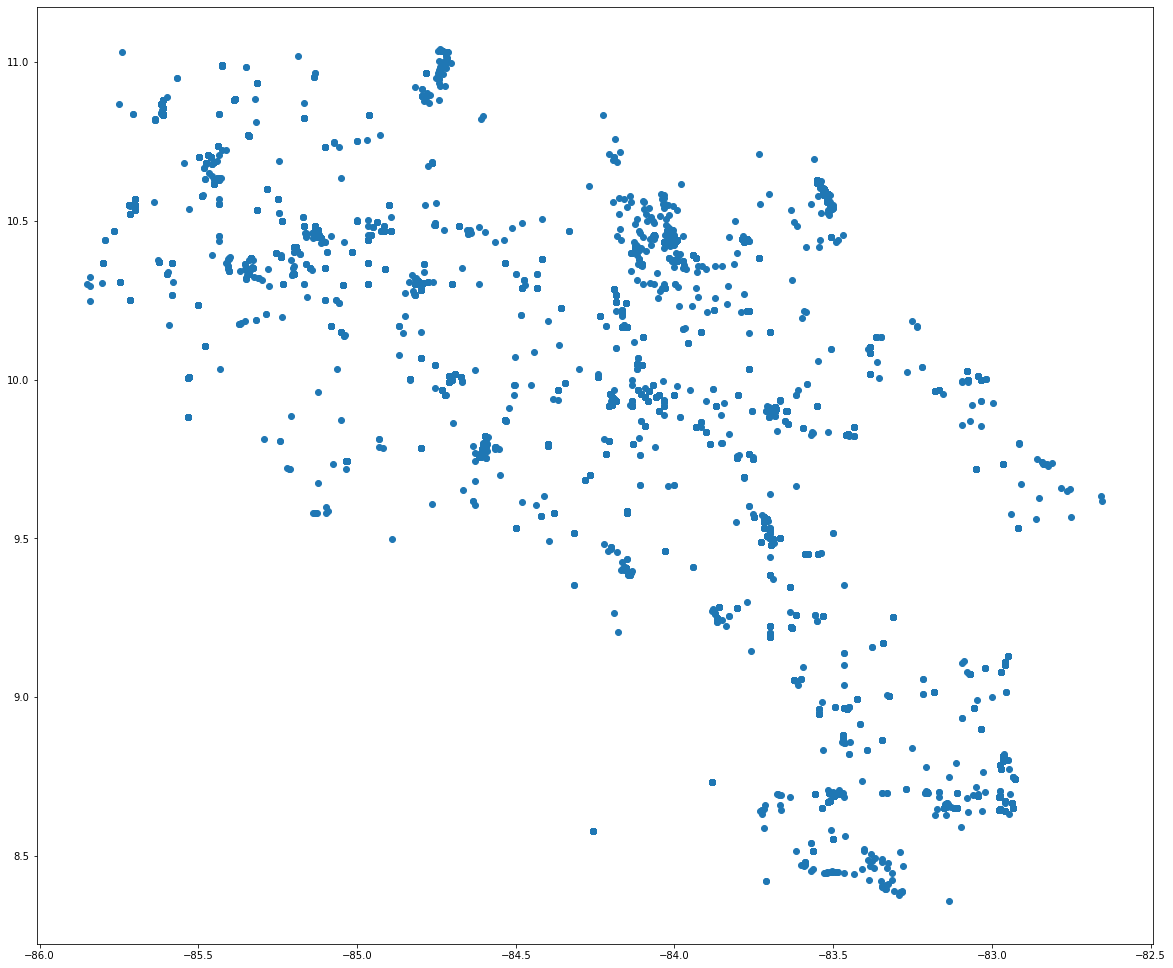

In [14]:
murcielagos = gpd.GeoDataFrame(murcielagos, geometry=gpd.points_from_xy(murcielagos.decimalLongitude, murcielagos.decimalLatitude))
murcielagos.plot(figsize=(20, 20))

##### Capas geoespaciales de Costa Rica

###### Áreas silvestres protegidas (ASP)

In [15]:
wfs = WebFeatureService(url='http://geos1pne.sirefor.go.cr/wfs', version='1.1.0')

# Parámetros de la solicitud
params = dict(service='WFS',
              version='1.1.0', 
              request='GetFeature', 
              typeName='PNE:areas_silvestres_protegidas',
              srsName='urn:ogc:def:crs:EPSG::4326',
              outputFormat='json')

# Solicitud
response = requests.Request("GET", "http://geos1pne.sirefor.go.cr/wfs", params=params).prepare().url
response

'http://geos1pne.sirefor.go.cr/wfs?service=WFS&version=1.1.0&request=GetFeature&typeName=PNE%3Aareas_silvestres_protegidas&srsName=urn%3Aogc%3Adef%3Acrs%3AEPSG%3A%3A4326&outputFormat=json'

<AxesSubplot:>

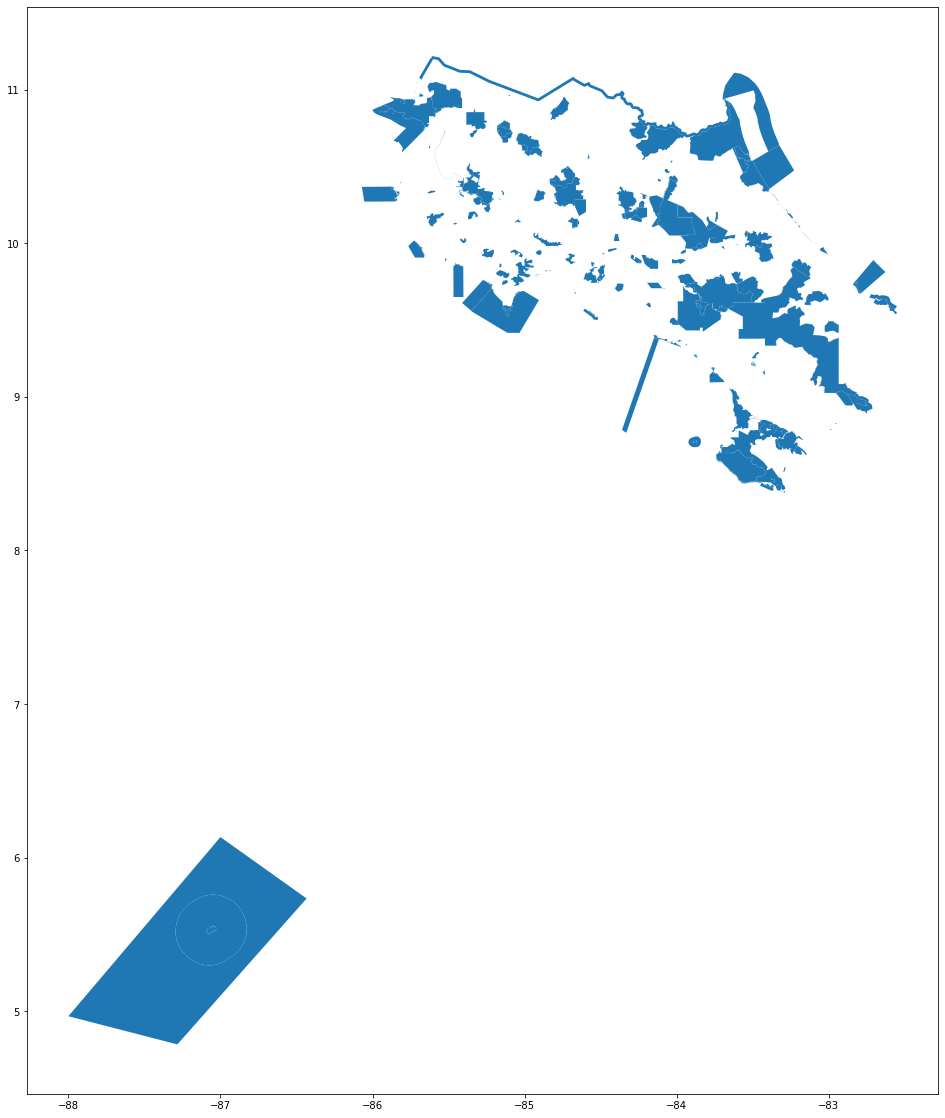

In [16]:
# Leer datos del URL
asp = gpd.read_file(response)

asp.plot(figsize=(20, 20))

#### 2. Visualización de todas las capas

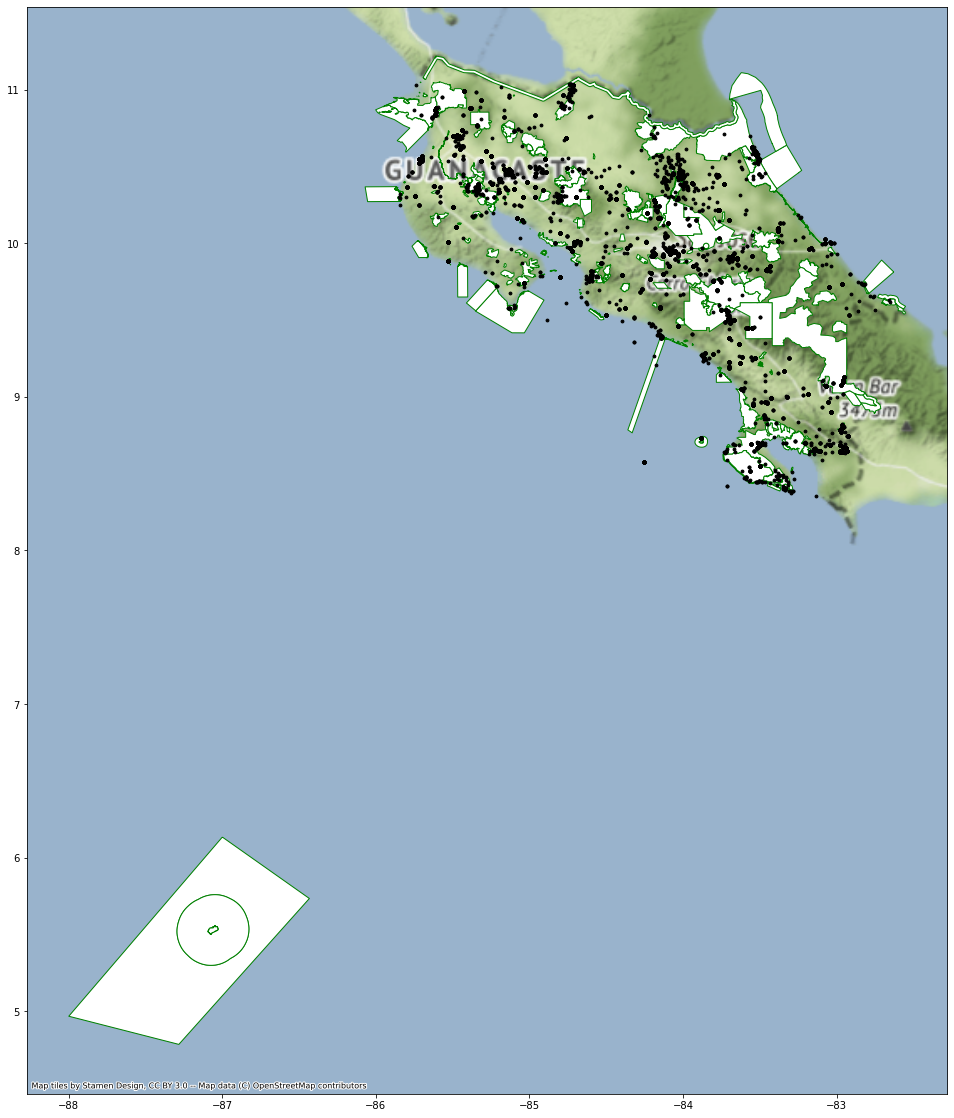

In [17]:
# Mapa con todas las capas

base = asp.plot(color='white', edgecolor='green', figsize=(20, 20))
ax = murcielagos.plot(ax=base, marker='o', color='black', markersize=8)

cx.add_basemap(ax, crs=asp.crs)

#### 3. Conteo de especies en cada polígono

In [18]:
# Join espacial de las capas de ASP y registros de presencia de murciélagos

asp_contains_murcielagos = asp.sjoin(murcielagos, how="inner", op="contains")

/home/mfvargas/miniconda3/envs/pf3311/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/mfvargas/miniconda3/envs/pf3311/lib/python3.10/site-packages/geopandas/geodataframe.py:1938: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


In [19]:
asp_contains_murcielagos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2221 entries, 13 to 170
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   id                                2221 non-null   object  
 1   codigo                            2221 non-null   object  
 2   nombre_asp                        2221 non-null   object  
 3   cat_manejo                        2221 non-null   object  
 4   estatus                           2221 non-null   object  
 5   siglas_cat                        2221 non-null   object  
 6   nombre_ac                         2221 non-null   object  
 7   siglas_ac                         2221 non-null   object  
 8   descripcio                        2221 non-null   object  
 9   a_creacion                        2221 non-null   int64   
 10  n_creacion                        2221 non-null   object  
 11  normativa                         0 non-null    

In [20]:
asp_contains_murcielagos

,id,codigo,nombre_asp,cat_manejo,estatus,siglas_cat,nombre_ac,siglas_ac,descripcio,a_creacion,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
13,areas_silvestres_protegidas.14,H13,Humedal lacustrino Rio Canas,Humedal,Estatal,HH,Area de Conservacion Tempisque,ACT,Area terrestre protegida,1994,...,"Kristina Yamamoto, Andrea Caiozzi-Cofre (MVZ)",NaN,CC_BY_NC_4_0,NaN,"MALAGA-A., A.",NaN,NaN,2021-12-02T04:04:03.547Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;BASIS_OF_RECORD_I...
13,areas_silvestres_protegidas.14,H13,Humedal lacustrino Rio Canas,Humedal,Estatal,HH,Area de Conservacion Tempisque,ACT,Area terrestre protegida,1994,...,"Kristina Yamamoto, Andrea Caiozzi-Cofre (MVZ)",NaN,CC_BY_NC_4_0,NaN,"MALAGA-A., A.",NaN,NaN,2021-12-02T04:04:03.549Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;BASIS_OF_RECORD_I...
13,areas_silvestres_protegidas.14,H13,Humedal lacustrino Rio Canas,Humedal,Estatal,HH,Area de Conservacion Tempisque,ACT,Area terrestre protegida,1994,...,"Kristina Yamamoto, Andrea Caiozzi-Cofre (MVZ)",NaN,CC_BY_NC_4_0,NaN,"MALAGA-A., A.",NaN,NaN,2021-12-02T04:04:03.548Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;BASIS_OF_RECORD_I...
13,areas_silvestres_protegidas.14,H13,Humedal lacustrino Rio Canas,Humedal,Estatal,HH,Area de Conservacion Tempisque,ACT,Area terrestre protegida,1994,...,"Kristina Yamamoto, Andrea Caiozzi-Cofre (MVZ)",NaN,CC_BY_NC_4_0,NaN,"MALAGA-A., A.",NaN,NaN,2021-12-02T04:04:03.547Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;BASIS_OF_RECORD_I...
13,areas_silvestres_protegidas.14,H13,Humedal lacustrino Rio Canas,Humedal,Estatal,HH,Area de Conservacion Tempisque,ACT,Area terrestre protegida,1994,...,"Kristina Yamamoto, Andrea Caiozzi-Cofre (MVZ)",NaN,CC_BY_NC_4_0,NaN,"MALAGA-A., A.",NaN,NaN,2021-12-02T04:04:03.548Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;BASIS_OF_RECORD_I...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,areas_silvestres_protegidas.171,P18,Internacional La Amistad,Parque Nacional,Estatal,PN,Area de Conservacion La Amistad Pacifico,ACLAP,Area terrestre protegida,1982,...,NaN,NaN,CC_BY_4_0,Barcode of Life Datasystems,NaN,NaN,NaN,2021-12-01T17:18:04.335Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84
170,areas_silvestres_protegidas.171,P18,Internacional La Amistad,Parque Nacional,Estatal,PN,Area de Conservacion La Amistad Pacifico,ACLAP,Area terrestre protegida,1982,...,NaN,NaN,CC_BY_4_0,Barcode of Life Datasystems,NaN,NaN,NaN,2021-12-01T17:19:01.362Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84
170,areas_silvestres_protegidas.171,P18,Internacional La Amistad,Parque Nacional,Estatal,PN,Area de Conservacion La Amistad Pacifico,ACLAP,Area terrestre protegida,1982,...,NaN,NaN,CC_BY_4_0,Barcode of Life Datasystems,NaN,NaN,NaN,2021-12-01T17:18:58.795Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84
170,areas_silvestres_protegidas.171,P18,Internacional La Amistad,Parque Nacional,Estatal,PN,Area de Conservacion La Amistad Pacifico,ACLAP,Area terrestre protegida,1982,...,NaN,NaN,CC_BY_4_0,Barcode of Life Datasystems,NaN,NaN,NaN,2021-12-01T17:19:49.491Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84


<AxesSubplot:>

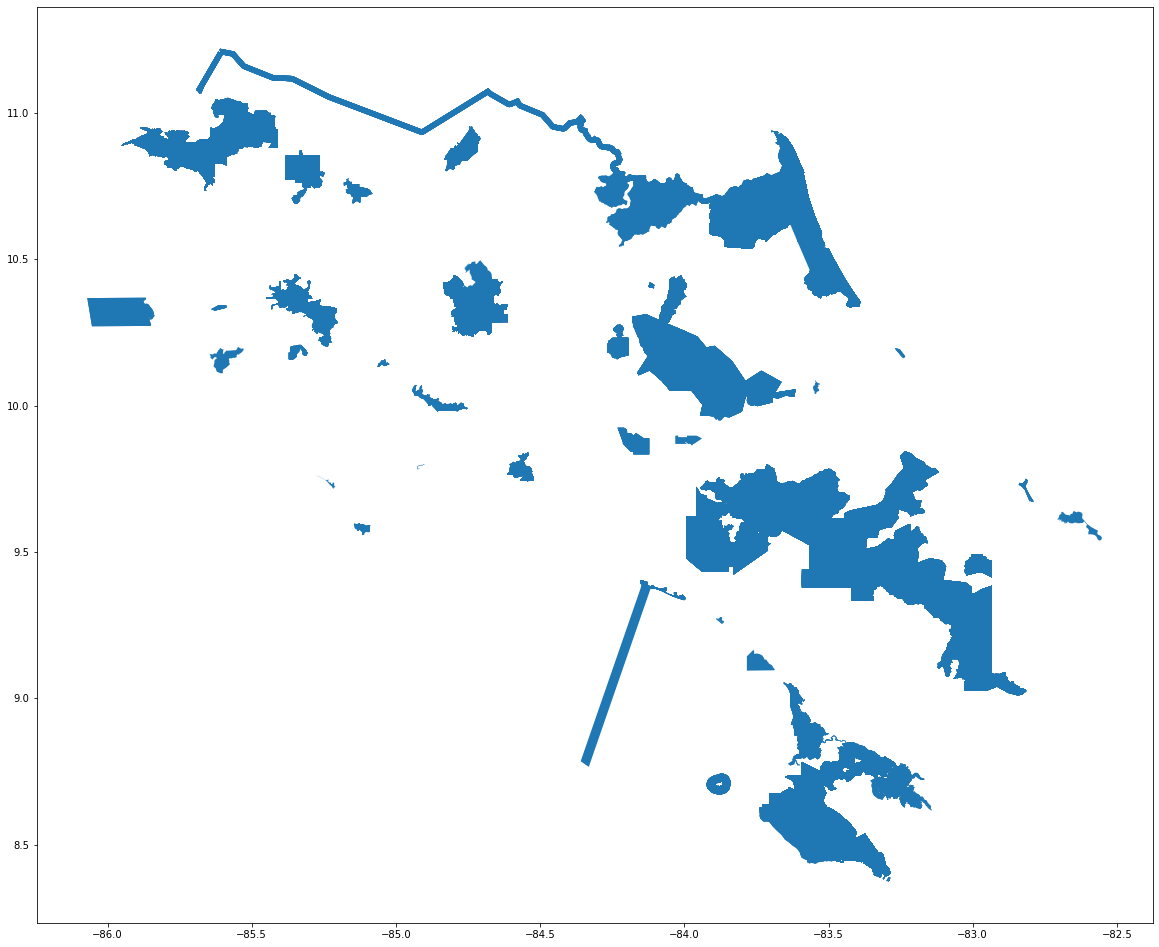

In [21]:
asp_contains_murcielagos.plot(figsize=(20, 20))

In [22]:
# Conteo de especies en cada ASP
asp_count_especies = asp_contains_murcielagos.groupby("id").species.nunique()
asp_count_especies = asp_count_especies.reset_index() # para convertir la serie a dataframe

asp_count_especies.rename(columns = {'species': 'especies_murcielagos'}, inplace = True)

asp_count_especies.head(10)

,id,especies_murcielagos
0,areas_silvestres_protegidas.101,2
1,areas_silvestres_protegidas.103,27
2,areas_silvestres_protegidas.107,1
3,areas_silvestres_protegidas.110,2
4,areas_silvestres_protegidas.121,31
5,areas_silvestres_protegidas.124,1
6,areas_silvestres_protegidas.132,1
7,areas_silvestres_protegidas.137,6
8,areas_silvestres_protegidas.139,1
9,areas_silvestres_protegidas.14,1


In [23]:
# Join para agregar la columna con el conteo a la capa de ASP
asp_especies = asp.join(asp_count_especies.set_index('id'), on='id', rsuffix='_b')
asp_especies

,id,codigo,nombre_asp,cat_manejo,estatus,siglas_cat,nombre_ac,siglas_ac,descripcio,a_creacion,n_creacion,normativa,area,area_km,version,geometry,especies_murcielagos
0,areas_silvestres_protegidas.1,A01,Montes Submarinos,Area Marina de Manejo,Estatal,AMM,Marina Cocos,ACMC,Area Marina de Manejo,2011,DE_36452,None,9.592623e+09,9.592623e+07,2019-11-19-001,"POLYGON ((-87.00000 6.13333, -86.43333 5.73333...",NaN
1,areas_silvestres_protegidas.2,A02,Cabo Blanco,Area Marina de Manejo,Estatal,AMM,Area de Conservacion Tempisque,ACT,Area Marina de Manejo,1963,Ley_10,None,8.247806e+08,8.247806e+06,2019-11-19-001,"POLYGON ((-85.14336 9.59649, -85.14332 9.59643...",NaN
2,areas_silvestres_protegidas.3,B01,Alberto Manuel Brenes,Reserva Biologica,Estatal,RB,Area de Conservacion Central,ACC,Area terrestre protegida,1993,Ley_7354,None,7.800440e+07,7.800440e+05,2019-11-19-001,"POLYGON ((-84.63388 10.18202, -84.64167 10.177...",NaN
3,areas_silvestres_protegidas.4,B03,Isla Guayabo,Reserva Biologica,Estatal,RB,Area de Conservacion Tempisque,ACT,Isla,1973,DE_2858_A,None,6.268092e+04,6.268092e+02,2019-11-19-001,"POLYGON ((-84.87710 9.91109, -84.87737 9.91086...",NaN
4,areas_silvestres_protegidas.5,B04,Isla Pajaros,Reserva Biologica,Estatal,RB,Area de Conservacion Pacifico Central,ACOPAC,Isla,1976,DE_ 5963_A,None,3.211583e+04,3.211583e+02,2019-11-19-001,"POLYGON ((-84.99674 10.09266, -84.99696 10.092...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,areas_silvestres_protegidas.168,Z31,Quebrada Rosario,Zona Protectora,Estatal,ZP,Area de Conservacion Central,ACC,Area terrestre protegida,1997,DE_ 26297_MINAE,None,4.292695e+05,4.292695e+03,2019-11-19-001,"POLYGON ((-84.07619 9.70425, -84.07689 9.70374...",NaN
168,areas_silvestres_protegidas.169,P10,Santa Rosa,Parque Nacional,Estatal,PN,Area de Conservacion Guanacaste,ACG,Isla,1966,Ley_3694,None,3.230258e+06,3.230258e+04,2019-11-19-001,"MULTIPOLYGON (((-85.87565 10.84304, -85.87571 ...",NaN
169,areas_silvestres_protegidas.170,V25,Bahia Junquillal,Refugio Nacional de Vida Silvestre,Estatal,RVS,Area de Conservacion Guanacaste,ACG,Isla,1995,DE_ 23867_MIRENEM,None,1.836792e+05,1.836792e+03,2021-08-20-001,"MULTIPOLYGON (((-85.73360 10.95775, -85.73329 ...",NaN
170,areas_silvestres_protegidas.171,P18,Internacional La Amistad,Parque Nacional,Estatal,PN,Area de Conservacion La Amistad Pacifico,ACLAP,Area terrestre protegida,1982,DE_13324_A,None,1.982896e+09,1.982896e+07,2019-11-19-001,"MULTIPOLYGON (((-82.85282 9.01273, -82.85414 9...",11.0


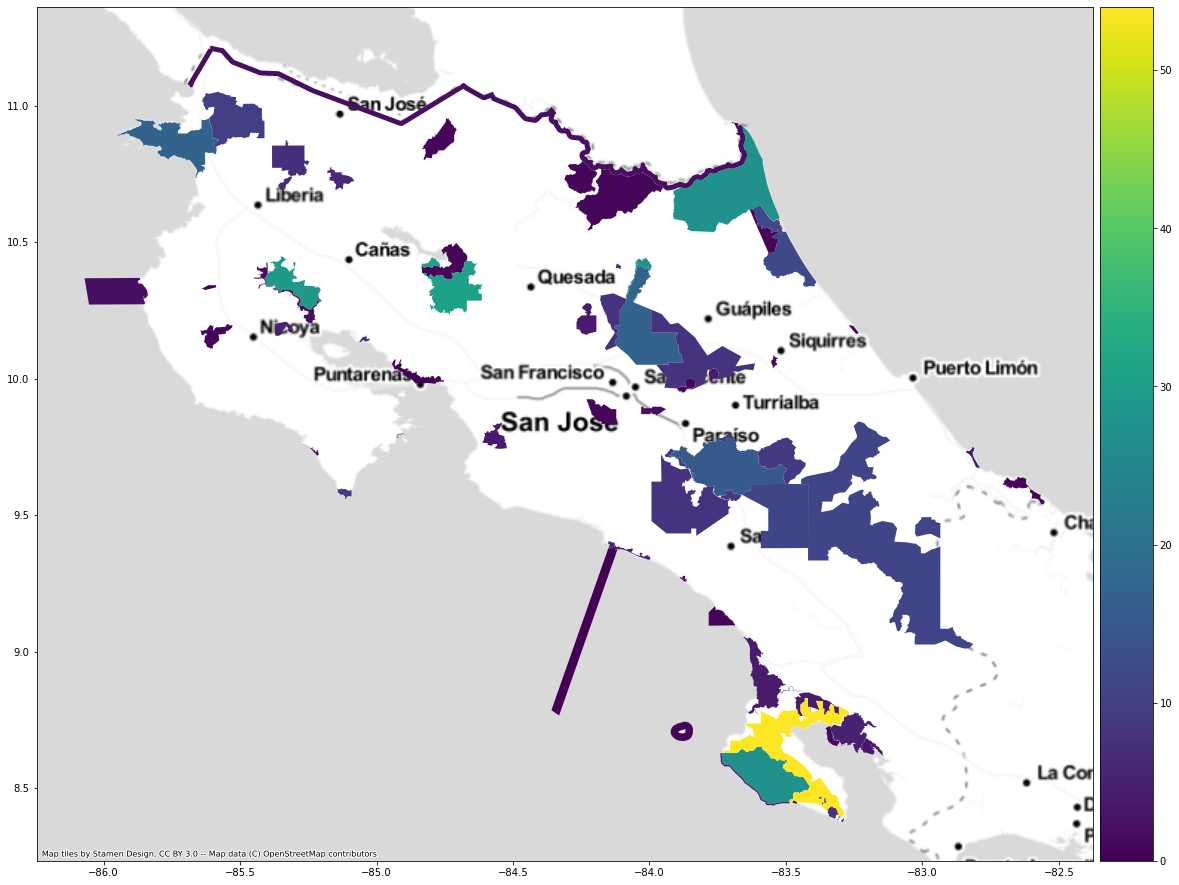

In [24]:
# Mapeo

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

asp_especies.plot(column='especies_murcielagos', ax=ax, legend=True, cax=cax)

cx.add_basemap(ax, crs=asp_especies.crs, source=cx.providers.Stamen.TonerLite)